# Lab 1: Phân loại thử rác với mô hình Stacking Ensemble

| MSSV     | Họ tên         | Email             |
|----------|----------------|-------------------|
| 21120107 | Nguyễn Minh Nhật    | 21120107@student.hcmus.edu.vn |
| 21120056 | Nguyễn Đặng Tường Duy      | 21120107@student.hcmus.edu.vn  |


## 1. Tập dữ liệu Enron-Spam



### 1.1 Giới thiệu

- Bộ dữ liệu Enron-Spam là một nguồn tài liệu tuyệt vời được thu thập bởi V. Metsis, I. Androutsopoulos và G. Paliouras và được mô tả trong ấn phẩm của họ "Spam Filtering with Naive Bayes - Which Naive Bayes?". Bộ dữ liệu chứa tổng cộng 17.171 thư rác và 16.545 thư không phải thư rác ("ham") (tổng cộng 33.716 thư điện tử).
- Mỗi thư (1 dòng) trong tập dữ liệu có đặc điểm như sau:
  - **Subject**: Tên tiêu đề của thư.
  - **Message**: Nội dung của email. Có thể chứa chuỗi rỗng nếu tin nhắn chỉ có dòng tiêu đề và không có nội dung. Trong trường hợp chuyển tiếp email hoặc trả lời, điều này cũng chứa tin nhắn gốc với dòng tiêu đề, "từ:", "đến:", v.v.
  - **Spam/Ham**: Có giá trị "spam" hoặc "ham". Nhãn của thư được phân loại có là tin nhắn spam hay không.


### 1.2 Tải tập dữ liệu


- Tải từ moodle.
- Tải từ link drive: [data](https://drive.google.com/drive/folders/16Yn9K_ONEV2KAPcPQwwzzqkq9KZaHzWb)
- Thư mục dữ liệu bao gồm 2 file: `train.csv` và `val.csv`
  - **train.csv**: Gồm những dữ liệu dùng để huấn luyện mô hình.
  - **val.csv**: Gồm những dữ liệu để đánh giá mô hình sau khi train.



### 1.3 Yêu cầu


Trong phần này, nhóm cần hoàn thành các yêu cầu sau:
- Tải xuống và đọc được toàn bộ tập dữ liệu Enron-Spam.
- Đọc dữ liệu từ file và in ra 5 dòng đầu tiên của tập dữ liệu.

In [ ]:
!pip -q install gdown scikit-learn xgboost matplotlib seaborn

In [ ]:
!gdown --folder https://drive.google.com/drive/folders/16Yn9K_ONEV2KAPcPQwwzzqkq9KZaHzWb -O /content/

Retrieving folder contents
Processing file 1kslE5701PCpFJEvE8D1YhFDSB6vgHNDG CSC18101_Lab1.pdf
Processing file 1yDIZFTKjYRZCiCdaozrbfUVPg2kNy_3v train.csv
Processing file 1YJbNEpm2Fyr3uO9H9h3rIUmtPG2tHftd val.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1kslE5701PCpFJEvE8D1YhFDSB6vgHNDG
To: /content/Lab1_dataset/CSC18101_Lab1.pdf
100% 66.7k/66.7k [00:00<00:00, 50.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yDIZFTKjYRZCiCdaozrbfUVPg2kNy_3v
To: /content/Lab1_dataset/train.csv
100% 38.6M/38.6M [00:00<00:00, 50.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YJbNEpm2Fyr3uO9H9h3rIUmtPG2tHftd
To: /content/Lab1_dataset/val.csv
100% 4.44M/4.44M [00:00<00:00, 50.7MB/s]
Download completed


In [ ]:
import pandas as pd
train_df = pd.read_csv('/content/Lab1_dataset/train.csv')
val_df = pd.read_csv('/content/Lab1_dataset/val.csv')

In [ ]:
train_df.head()

,Unnamed: 0,Message ID,Subject,Message,Spam/Ham,split
0,0,0,christmas tree farm pictures,NaN,ham,0.038415
1,1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,0.696509
2,2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,0.587792
3,3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,-0.055438
4,5,5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",ham,-0.419658


In [ ]:
val_df.head()

,Unnamed: 0,Message ID,Subject,Message,Spam/Ham,split
0,23,23,miscellaneous,- - - - - - - - - - - - - - - - - - - - - - fo...,ham,-0.351998
1,24,24,re : purge of old contract _ event _ status,fyi - what do you all think ?\n- - - - - - - -...,ham,0.257704
2,32,32,valero 8018 and 1394,it is my understanding the outages valero incu...,ham,0.091200
3,37,37,01 / 00 natural gas nomination,enron methanol company nominates the following...,ham,-1.745133
4,43,43,re : misc . questions,- - - - - - - - - - - - - - - - - - - - - - fo...,ham,-1.911987


## 2. Tiền xử lý dữ liệu



### 2.1 Về dữ liệu



- Nội dung dữ liệu:
  - **Đầu vào** gồm có 2 đặc trưng: `Subject`, `Message`.
  - **Đầu ra** là một nhãn của email: `Spam` hoặc `Ham`.


### 2.2 Yêu cầu


Trong phần này, nhóm cần hoàn thành các yêu cầu sau:
- (Optional) Làm sạch dữ liệu nếu có thể: kiểm tra những dòng bị lặp, biến đổi/sắp xếp thứ tự các dòng dữ liệu lại, ...
- Các nhóm được phép sử dụng thêm một số phương pháp khác để gia tăng hiệu quả của mô hình nhưng nhóm cần cho biết phương pháp mình áp dụng là gì và mức độ cải thiện cụ thể gia tăng bao nhiêu.

In [ ]:
# Remove unused columns, rows with both null subject and null message and duplicate rows
train_df.drop(['Unnamed: 0', 'Message ID', 'split'], axis=1, inplace=True)
train_df = train_df.dropna(subset=['Subject', 'Message'], how='all')
train_df.drop_duplicates(inplace = True)
train_df.reset_index(drop = True, inplace = True)

val_df.drop(['Unnamed: 0', 'Message ID', 'split'], axis=1, inplace=True)
val_df = val_df.dropna(subset=['Subject', 'Message'], how='all')
val_df.drop_duplicates(inplace = True)
val_df.reset_index(drop = True, inplace = True)

<ipython-input-5-d6284ced4191>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df.drop_duplicates(inplace = True)


In [ ]:
import re
import nltk
nltk.download('stopwords') # need this on colab, but kaggle doesnt, idk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# !unzip -q /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
!unzip -q /root/nltk_data/corpora/wordnet.zip -d /root/nltk_data/corpora/

In [ ]:
def str_norm(text):
    text = re.sub(r'\\r\\n', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'^b\s+', '', text)
    text = text.lower()
    text = [word for word in text.split() if word not in stopwords]
    # text = " ".join([stemmer.stem(word) for word in text])
    text = " ".join([lemmatizer.lemmatize(word) for word in text])
    return text

In [ ]:
train_df['Subject'] = train_df['Subject'].fillna('').apply(str_norm)
train_df['Message'] = train_df['Message'].fillna('').apply(str_norm)
val_df['Subject'] = val_df['Subject'].fillna('').apply(str_norm)
val_df['Message'] = val_df['Message'].fillna('').apply(str_norm)

In [ ]:
train_df['Subject'] = train_df['Subject'].fillna('')
train_df['Message'] = train_df['Message'].fillna('')
val_df['Subject'] = val_df['Subject'].fillna('')
val_df['Message'] = val_df['Message'].fillna('')

train_df['text'] = train_df['Subject'] + " " + train_df['Message']
val_df['text'] = val_df['Subject'] + " " + val_df['Message']

train_df['label'] = train_df['Spam/Ham'].apply(lambda x: 1 if x == 'spam' else 0)
val_df['label'] = val_df['Spam/Ham'].apply(lambda x: 1 if x == 'spam' else 0)

In [ ]:
train_df

,Subject,Message,Spam/Ham,text,label
0,christmas tree farm picture,,ham,christmas tree farm picture,0
1,vastar resource inc,gary production high island larger block 1 2 c...,ham,vastar resource inc gary production high islan...,0
2,calpine daily gas nomination,calpine daily gas nomination 1 doc,ham,calpine daily gas nomination calpine daily gas...,0
3,issue,fyi see note already done stella forwarded ste...,ham,issue fyi see note already done stella forward...,0
4,mcmullen gas 11 99,jackie since inlet 3 river plant shut 10 19 99...,ham,mcmullen gas 11 99 jackie since inlet 3 river ...,0
...,...,...,...,...,...
25017,cure premature ejaculation,hello ejaculate within minute penetration prem...,spam,cure premature ejaculation hello ejaculate wit...,1
25018,error,hello welcome gigapharm onlinne shop prescri l...,spam,error hello welcome gigapharm onlinne shop pre...,1
25019,prescript medicine special precise put buck ba...,got earlier expected wrapped cautiously impres...,spam,prescript medicine special precise put buck ba...,1
25020,next generation online pharmacy,ready rock let man rise solitude show u societ...,spam,next generation online pharmacy ready rock let...,1


In [ ]:
val_df

,Subject,Message,Spam/Ham,text,label
0,miscellaneous,forwarded ami chokshi corp enron 12 17 99 03 4...,ham,miscellaneous forwarded ami chokshi corp enron...,0
1,purge old contract event status,fyi think forwarded brenda f herod hou ect 12 ...,ham,purge old contract event status fyi think forw...,0
2,valero 8018 1394,understanding outage valero incurred location ...,ham,valero 8018 1394 understanding outage valero i...,0
3,01 00 natural gas nomination,enron methanol company nominates following req...,ham,01 00 natural gas nomination enron methanol co...,0
4,misc question,forwarded ami chokshi corp enron 12 22 99 08 1...,ham,misc question forwarded ami chokshi corp enron...,0
...,...,...,...,...,...
3027,2 discussion health,ge ri ia ne cc li b ft ta boo urse er styo xua...,spam,2 discussion health ge ri ia ne cc li b ft ta ...,1
3028,gain 3 full inch length,rated 1 penis enlargement pill market gain 3 f...,spam,gain 3 full inch length rated 1 penis enlargem...,1
3029,compliance needed,name mr suzana nuhan vaye barr james broderick...,spam,compliance needed name mr suzana nuhan vaye ba...,1
3030,huge avings best selling xp pro title,opt email special offer unsubscribe search sof...,spam,huge avings best selling xp pro title opt emai...,1


#### Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Number of spam emails in train set: 12055
Number of ham emails in train set: 12967


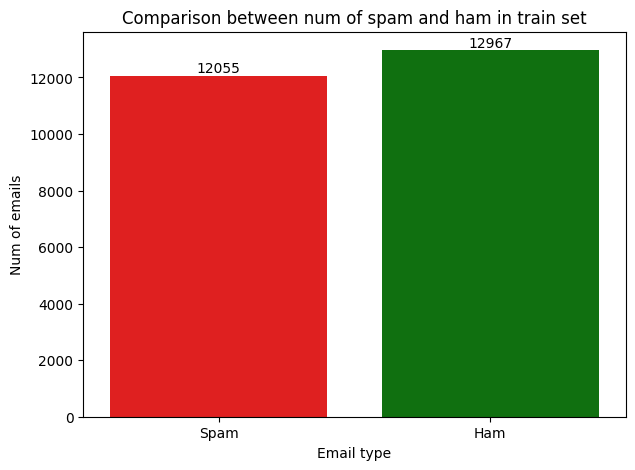

In [ ]:
# Class distribution in val
num_spam = train_df[train_df['Spam/Ham'] == 'spam'].shape[0]
num_ham = train_df[train_df['Spam/Ham'] == 'ham'].shape[0]
print(f'Number of spam emails in train set: {num_spam}')
print(f'Number of ham emails in train set: {num_ham}')

plt.figure(figsize=(7, 5))
# plt.bar(10, num_spam, 3, label="Spam", color='red')
# plt.bar(15, num_ham, 3, label="Ham", color='green')
bars = sns.barplot(x=['Spam', 'Ham'], y=[num_spam, num_ham], palette=['red', 'green'], hue=['Spam', 'Ham'], legend=False)
# plt.legend()
plt.xlabel('Email type')
plt.ylabel('Num of emails')
plt.title('Comparison between num of spam and ham in train set')

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             int(bar.get_height()), ha='center', va='bottom')

plt.show()

Number of spam emails in val set: 1518
Number of ham emails in val set: 1514


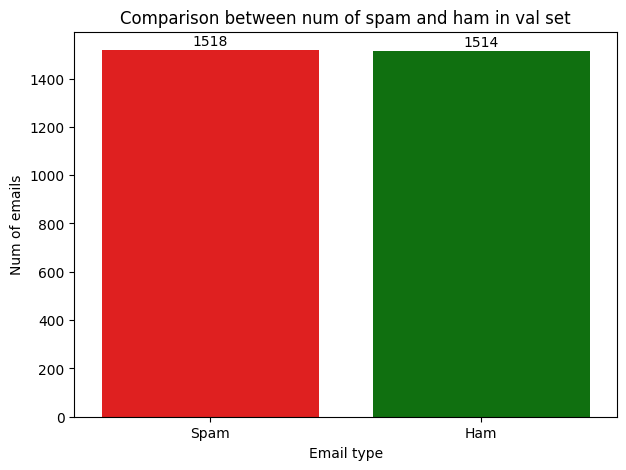

In [ ]:
# Class distribution in val
num_spam = val_df[val_df['Spam/Ham'] == 'spam'].shape[0]
num_ham = val_df[val_df['Spam/Ham'] == 'ham'].shape[0]
print(f'Number of spam emails in val set: {num_spam}')
print(f'Number of ham emails in val set: {num_ham}')

plt.figure(figsize=(7, 5))
# plt.bar(10, num_spam, 3, label="Spam", color='red')
# plt.bar(15, num_ham, 3, label="Ham", color='green')
bars = sns.barplot(x=['Spam', 'Ham'], y=[num_spam, num_ham], palette=['red', 'green'], hue=['Spam', 'Ham'], legend=False)
# plt.legend()
plt.xlabel('Email type')
plt.ylabel('Num of emails')
plt.title('Comparison between num of spam and ham in val set')

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             int(bar.get_height()), ha='center', va='bottom')

plt.show()

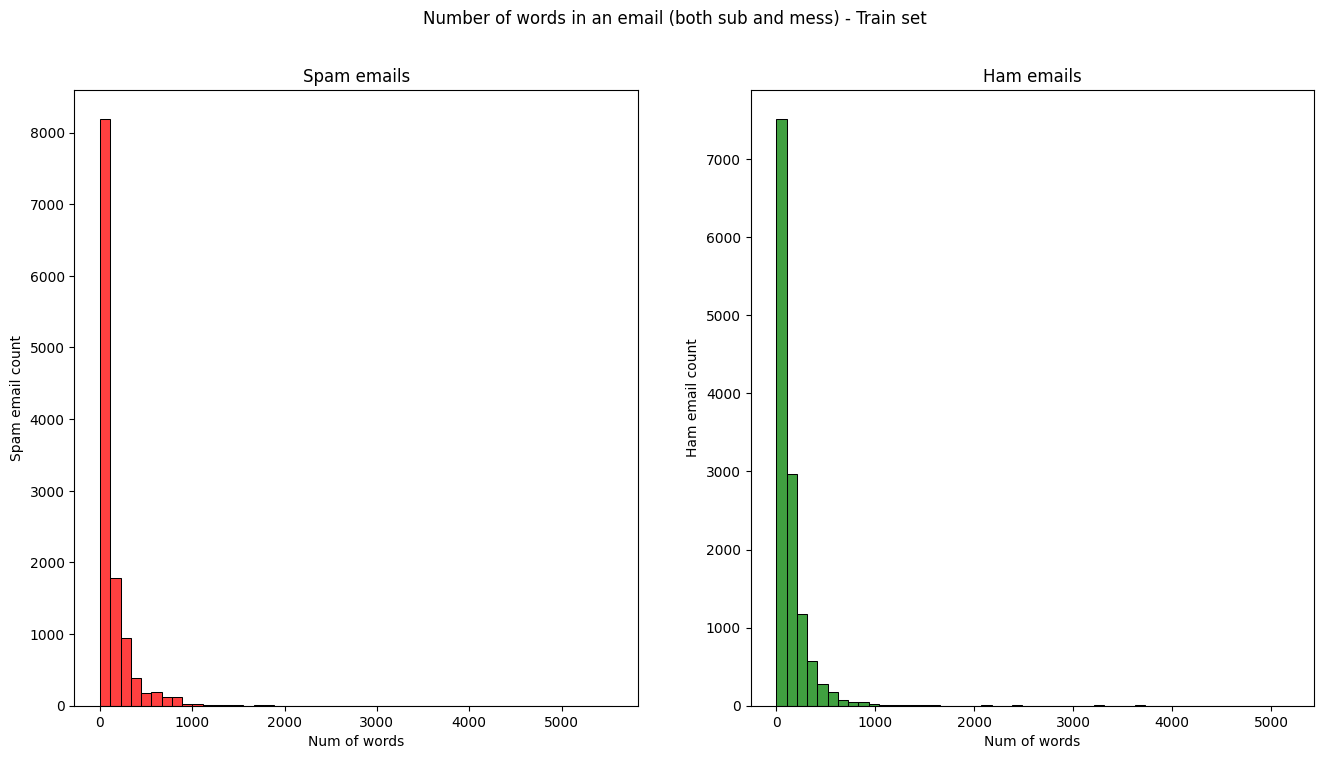

In [ ]:
# Num words in train set
num_words_in_spam = train_df[train_df['Spam/Ham'] == 'spam']['text'].str.split(' ').map(lambda x: len(x))
num_words_in_ham = train_df[train_df['Spam/Ham'] == 'ham']['text'].str.split(' ').map(lambda x: len(x))

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.histplot(num_words_in_spam, color='red', ax=axes[0], bins=50)
axes[0].set_title('Spam emails')
axes[0].set(xlabel='Num of words', ylabel='Spam email count')

sns.histplot(num_words_in_ham, color='green', ax=axes[1], bins=50)
axes[1].set_title('Ham emails')
axes[1].set(xlabel='Num of words', ylabel='Ham email count')

fig.suptitle('Number of words in an email (both sub and mess) - Train set')
plt.show()

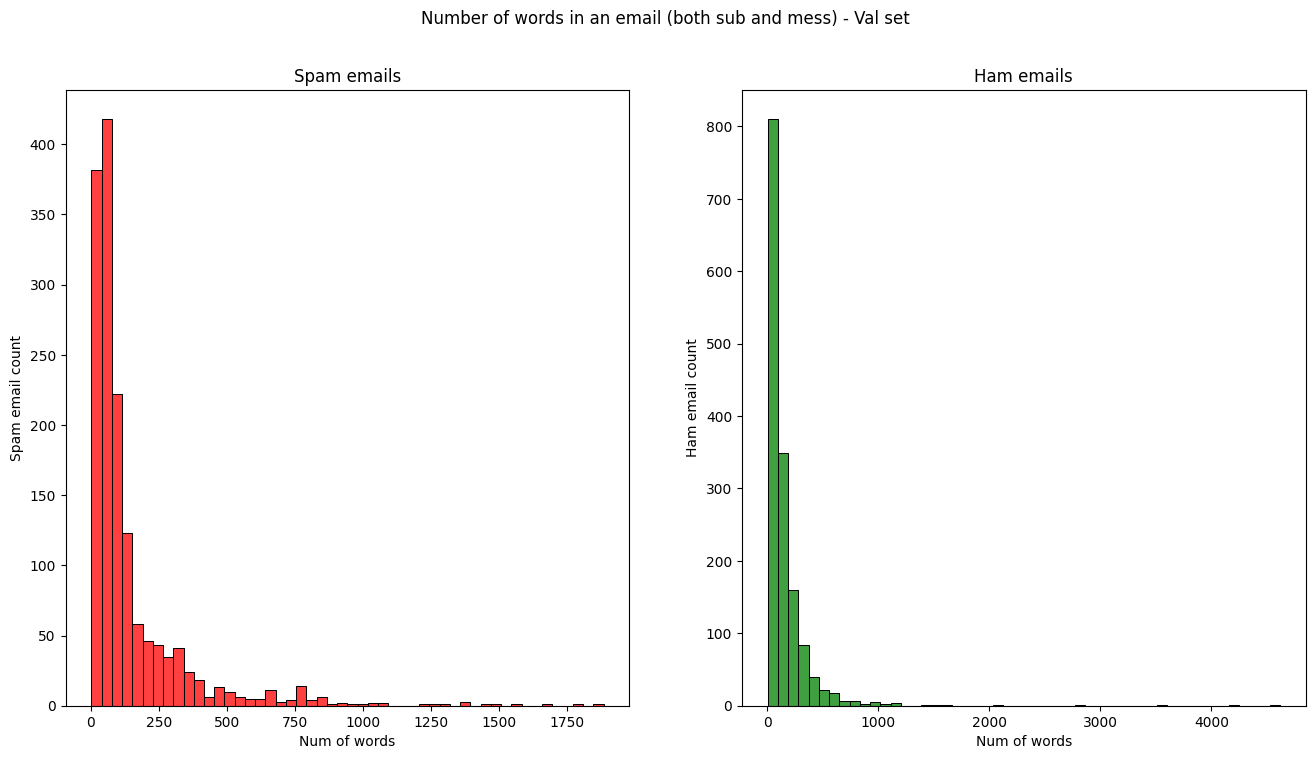

In [ ]:
# Num words in train set
num_words_in_spam = val_df[val_df['Spam/Ham'] == 'spam']['text'].str.split(' ').map(lambda x: len(x))
num_words_in_ham = val_df[val_df['Spam/Ham'] == 'ham']['text'].str.split(' ').map(lambda x: len(x))

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.histplot(num_words_in_spam, color='red', ax=axes[0], bins=50)
axes[0].set_title('Spam emails')
axes[0].set(xlabel='Num of words', ylabel='Spam email count')

sns.histplot(num_words_in_ham, color='green', ax=axes[1], bins=50)
axes[1].set_title('Ham emails')
axes[1].set(xlabel='Num of words', ylabel='Ham email count')

fig.suptitle('Number of words in an email (both sub and mess) - Val set')
plt.show()

In [ ]:
# Common words in spam/ham
from collections import Counter
from nltk.tokenize import word_tokenize
words_in_spam = word_tokenize(' '.join(train_df[train_df['Spam/Ham'] == 'spam']['text']))
words_in_ham = word_tokenize(' '.join(train_df[train_df['Spam/Ham'] == 'ham']['text']))
spam_word_counts = Counter(words_in_spam)
ham_word_counts = Counter(words_in_ham)
most_common_spam = spam_word_counts.most_common(100)
most_common_ham = ham_word_counts.most_common(100)
print("Most Common Spam Words:", most_common_spam)
print("Most Common Ham Words:", most_common_ham)

Most Common Spam Words: [('company', 9798), ('com', 8214), ('1', 6886), ('e', 6868), ('u', 6516), ('2', 6377), ('http', 6310), ('3', 6285), ('email', 5888), ('information', 5433), ('please', 5192), ('price', 5161), ('statement', 4976), ('5', 4669), ('0', 4513), ('security', 4477), ('may', 4396), ('one', 4394), ('get', 4342), ('time', 4303), ('00', 4273), ('business', 4039), ('stock', 3943), ('money', 3940), ('000', 3913), ('www', 3823), ('new', 3785), ('de', 3763), ('4', 3530), ('mail', 3517), ('report', 3474), ('product', 3402), ('within', 3299), ('free', 3295), ('7', 3094), ('number', 3079), ('day', 3035), ('investment', 2974), ('10', 2966), ('software', 2949), ('service', 2897), ('account', 2889), ('r', 2877), ('address', 2851), ('make', 2812), ('year', 2757), ('offer', 2740), ('order', 2708), ('need', 2696), ('message', 2637), ('click', 2632), ('6', 2611), ('site', 2589), ('future', 2550), ('inc', 2519), ('online', 2518), ('c', 2469), ('name', 2469), ('million', 2456), ('best', 244

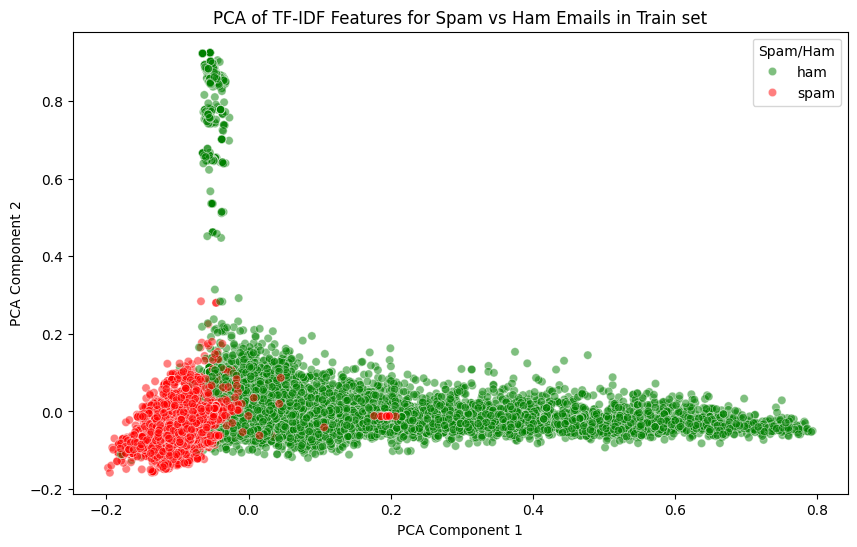

In [ ]:
# Duplicate cell later
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np

# Apply TF-IDF to 'Message' column
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(train_df['text'])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.where(train_df['Spam/Ham'] == 'spam', 1, 0), cmap='coolwarm', alpha=0.5)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=train_df['Spam/Ham'], palette=['green', 'red'], alpha=0.5)
plt.title('PCA of TF-IDF Features for Spam vs Ham Emails in Train set')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

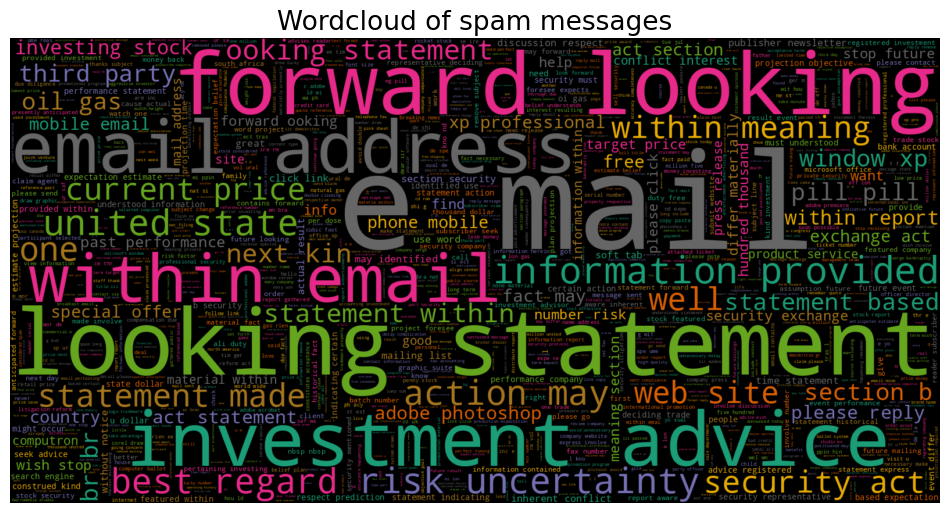

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
wc = WordCloud(max_words=1000 , width=1600 , height=800, colormap='Dark2').generate(" ".join(train_df[train_df['Spam/Ham'] == 'spam']['Message']))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of spam messages', fontsize=19)
plt.show()

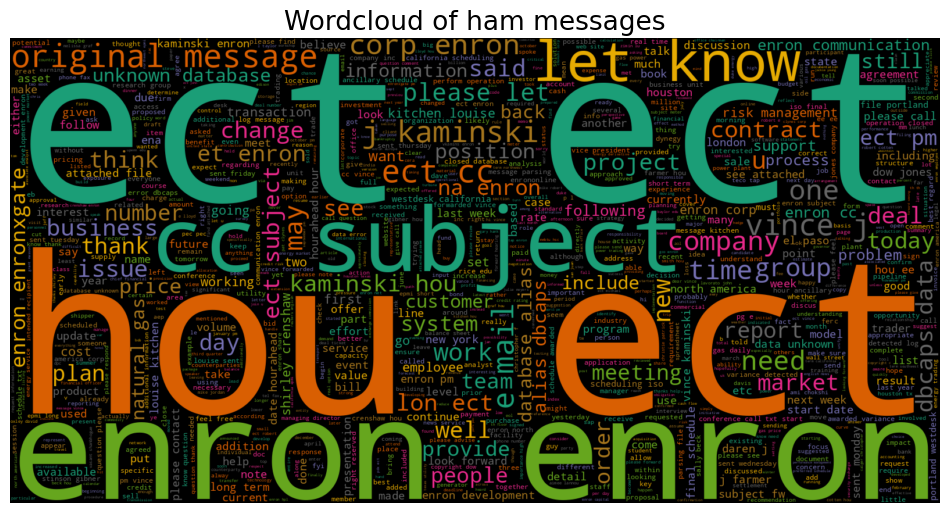

In [ ]:
plt.figure(figsize=(12,8))
wc = WordCloud(max_words=1000 , width=1600 , height=800, colormap='Dark2').generate(" ".join(train_df[train_df['Spam/Ham'] == 'ham']['Message']))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of ham messages', fontsize=19)
plt.show()

## 3. Các yêu cầu về mô hình



### 3.1 Mô hình



Lab này không giới hạn cách làm cho việc phân loại thư rác, miễn là các bạn sử dụng các mô hình phân loại và có thực hiện học có giám sát (supervised learning).



### 3.2 Yêu cầu


Trong phần này, nhóm cần hoàn thành các yêu cầu sau:
- Trình bày cấu trúc và cách thiết kế mô hình mình chọn một cách cụ thể, chi tiết từng bước tính toán từ đầu vào cho đến đầu ra.
- Trong mã nguồn, nếu nhóm sử dụng các tham số đặc biệt nào đó thì cần tìm hiểu và giải thích lý do tại sao chọn.
- Sau khi huấn luyện, cho biết độ chính xác của mô hình đối với toàn bộ tập dữ liệu (bao gồm cả tập trainset và valset). Có thể sử dụng nhiều cách để đánh giá và cần giải thích những đánh giá ấy có ý nghĩa gì.

In [ ]:
import os
import string
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [ ]:
X_train = train_df['text']
y_train = train_df['label']
X_val = val_df['text']
y_val = val_df['label']

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Tối đa 5000 từ đặc trưng

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

def evaluate_models(models, X_train, y_train, X_val, y_val):
    results = {}

    for name, model in models.items():
        print(f"\nTraining model: {name}")
        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)

        accuracy = accuracy_score(y_val, y_pred)
        print(f"Accuracy of {name}: {accuracy:.2f}")

        results[name] = {
            'accuracy': accuracy,
            'classification_report': classification_report(y_val, y_pred)
        }

    return results

In [ ]:
import joblib

def save_model(model, model_name, directory='saved_models'):
    if not os.path.exists(directory):
        os.makedirs(directory)
    filepath = os.path.join(directory, f"{model_name}.joblib")
    joblib.dump(model, filepath)
    print(f"Model {model_name} saved at {filepath}")

In [ ]:
log_reg = LogisticRegression(max_iter=100)
svm = SVC(probability=True)

param_grid_svc = {
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'penalty': ['l2'],
    'max_iter': [100, 200, 300, 400]
}

grid_search_svc = GridSearchCV(svm, param_grid_svc, cv=5, n_jobs=-1, verbose=1)
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, n_jobs=-1, verbose=1)

grid_search_svc.fit(X_train_tfidf, y_train)
grid_search_log_reg.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 200, 300, 400], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs', 'saga']},
             verbose=1)

In [ ]:
print(grid_search_svc.best_estimator_)
print(grid_search_log_reg.best_estimator_)

SVC(probability=True)
LogisticRegression(C=10, max_iter=200, solver='saga')


In [ ]:
# log_reg = LogisticRegression(C=10, max_iter=100, penalty='l2', solver='lbfgs')
# svm = SVC(probability=True, kernel='rbf', gamma='scale')

best_svc = grid_search_svc.best_estimator_
best_log_reg = grid_search_log_reg.best_estimator_
naive_bayes = MultinomialNB()
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

voting_clf = VotingClassifier(
    estimators=[
        ('svm', best_svc),
        ('log_reg', best_log_reg),
        ('naive_bayes', naive_bayes)
    ],
    voting='soft'
)

final_estimator = best_svc
estimators = [
    ('xgboost', xgboost),
    ('log_reg', best_log_reg),
    ('naive_bayes', naive_bayes)
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

models = {
    'Logistic Regression': best_log_reg,
    'SVM': best_svc,
    'Naive Bayes': naive_bayes,
    'XGBoost': xgboost,
    'Voting Classifier': voting_clf,
    'Stacking Classifier': stacking_clf
}

results = evaluate_models(models, X_train_tfidf, y_train, X_val_tfidf, y_val)

for model_name, result in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print(f"Classification Report:\n{result['classification_report']}")

    save_model(models[model_name], model_name)


Training model: Logistic Regression
Accuracy of Logistic Regression: 0.99

Training model: SVM
Accuracy of SVM: 0.99

Training model: Naive Bayes
Accuracy of Naive Bayes: 0.98

Training model: XGBoost


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:01:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of XGBoost: 0.98

Training model: Voting Classifier
Accuracy of Voting Classifier: 0.99

Training model: Stacking Classifier


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:20:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:21:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:21:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:22:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:23:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Accuracy of Stacking Classifier: 0.99

Model: Logistic Regression
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1514
           1       0.98      1.00      0.99      1518

    accuracy                           0.99      3032
   macro avg       0.99      0.99      0.99      3032
weighted avg       0.99      0.99      0.99      3032

Model Logistic Regression saved at saved_models/Logistic Regression.joblib

Model: SVM
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1514
           1       0.98      1.00      0.99      1518

    accuracy                           0.99      3032
   macro avg       0.99      0.99      0.99      3032
weighted avg       0.99      0.99      0.99      3032

Model SVM saved at saved_models/SVM.joblib

Model: Naive Bayes
Accuracy: 0.98
Classification Report:
              pr

In [ ]:
for model_name, result in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Classification Report:\n{result['classification_report']}")

    save_model(models[model_name], model_name)


Model: Logistic Regression
Accuracy: 0.9894459102902374
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1514
           1       0.98      1.00      0.99      1518

    accuracy                           0.99      3032
   macro avg       0.99      0.99      0.99      3032
weighted avg       0.99      0.99      0.99      3032

Model Logistic Regression saved at saved_models/Logistic Regression.joblib

Model: SVM
Accuracy: 0.9901055408970977
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1514
           1       0.98      1.00      0.99      1518

    accuracy                           0.99      3032
   macro avg       0.99      0.99      0.99      3032
weighted avg       0.99      0.99      0.99      3032

Model SVM saved at saved_models/SVM.joblib

Model: Naive Bayes
Accuracy: 0.9782321899736148
Classification Report:
            

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_model_comparison(results):
    model_names = []
    accuracies = []

    for model_name, result in results.items():
        model_names.append(model_name)
        accuracies.append(result['accuracy'])

    data = {'Model': model_names, 'Accuracy': accuracies}

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y='Accuracy', data=data)

    plt.title('Accuracy Comparison of Models', fontsize=16)
    plt.xlabel('Model', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xticks(rotation=45)

    # Điều chỉnh trục y để focus vào khoảng 0.97 -> 1
    plt.ylim(0.97, 1)

    plt.show()

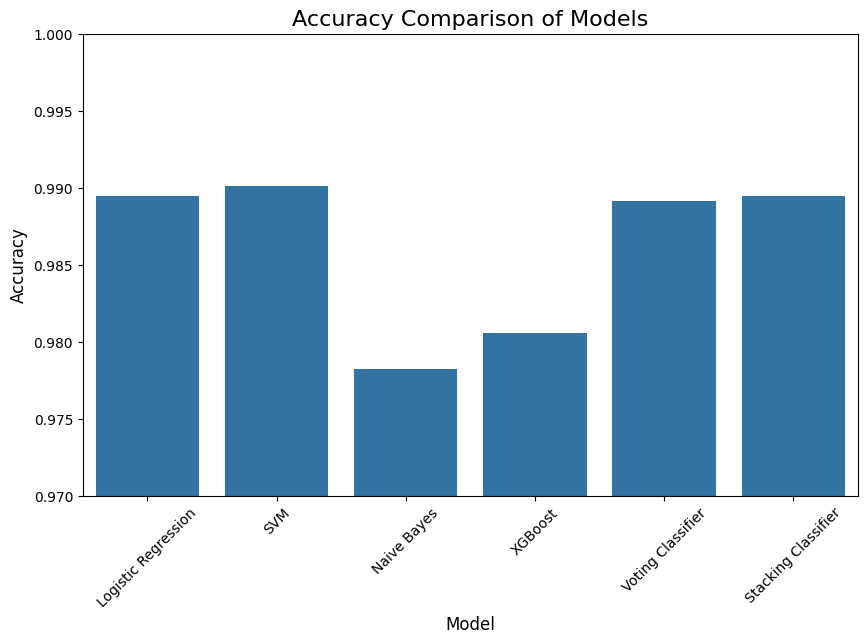

In [ ]:
plot_model_comparison(results)

In [ ]:
from sklearn import set_config
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('stacking_clf', stacking_clf)
])

pipeline.fit(X_train, y_train)

set_config(display='diagram')
pipeline

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:24:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:25:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:26:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:26:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:27:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('stacking_clf',
                 StackingClassifier(estimators=[('xgboost',
                                                 XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               device=None,
                                                               early_stopping_rounds=None,
                                                               enable_categorical=False,
                                                               eval_metric='mlogloss...
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=None,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=None, ...)),
                                                ('log_reg',
                                                 LogisticRegression(C=10,
                                                                    max_iter=200,
                                                                    solver='saga')),
                                                ('naive_bayes',
                                                 MultinomialNB())],
                                    final_estimator=SVC(probability=True)))])

In [ ]:
import joblib

joblib.dump(pipeline, 'enron_spam_pipeline.pkl')
print("Pipeline đã được lưu thành công!")

loaded_pipeline = joblib.load('enron_spam_pipeline.pkl')
print("Pipeline đã được tải thành công!")

accuracy = loaded_pipeline.score(X_val, y_val)
print(f'Accuracy của mô hình đã tải: {accuracy}')


Pipeline đã được lưu thành công!
Pipeline đã được tải thành công!
Accuracy của mô hình đã tải: 0.9894459102902374


## 4. Thử nghiệm thực tế




### 4.1 Mục đích


Mặc dù ta đã có tập dữ liệu val set để đánh giá mô hình, nhưng ta vẫn muốn thử khả năng của mô hình bằng cách viết email trực tiếp.



### 4.2 Yêu cầu


Trong phần này, nhóm cần hoàn thành các yêu cầu sau:
- **Chức năng 1**: Viết chương trình cho phép người dùng nhập vào một email bất kỳ (gồm tiêu đề và nội dung). Sau khi áp dụng các phương pháp tiền xử lý giống như đã làm với tập dữ liệu, chương trình chạy mô hình và trả ra kết quả dự đoán cho email vừa nhập.
- **Chức năng 2**: Chương trình phải cho phép đọc một file "csv" (Comma separated value) bất kỳ có cấu trúc như file `val.csv` (Bao gồm thông tin tiêu đề, nội dung và nhãn cho từng email) và thực hiện đánh giá kết quả dự đoán như đã thực hiện với tập `val.csv`.

In [ ]:
import numpy as np
import pandas as pd
import joblib

In [ ]:
sample = pd.DataFrame({
    # 'Subject': [np.nan],
    'Subject': ['Company: Monthly meeting report'],
    # 'Message': ['forwarded from the conference email checklist, please let us know if you have any problem in attending the next meeting'],
    # 'Message': ['Do you want to have some fun tonight at LoveXXX Hotel, handsome?'],
    'Message': [np.nan],
})
sample

,Subject,Message
0,Company: Monthly meeting report,NaN


In [ ]:
model_ = joblib.load('enron_spam_pipeline.pkl')
sample['text'] = sample['Subject'].fillna('') + " " + sample['Message'].fillna('')
pred = model_.predict(sample['text'])
print('Spam' if pred[0] == 1 else 'Ham')

Ham
